# King County Housing Project

**Authors:** Dermot, Eliot, Eddie
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [76]:
# Import standard packages
import itertools
import numpy as np
import pandas as pd 
pd.options.display.max_rows = 4000
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
%matplotlib inline

In [3]:
# Import the data
df = pd.read_csv('./data/kc_house_data.csv')
final_df = pd.read_csv('./data/ln_price_dataframe')

### Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

###### Data Exploration

In [4]:
df.shape

(21597, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df['waterfront'].isna().sum()

2376

In [24]:
df['sqft_living'].value_counts()

1300     138
1400     135
1440     133
1660     129
1010     129
1800     129
1820     128
1480     125
1720     125
1540     124
1560     124
1320     122
1250     120
1580     119
1200     118
1370     118
1650     117
1900     117
1780     117
1680     116
2100     116
1460     116
1430     115
1740     115
1830     114
1510     114
1340     113
1260     113
1500     112
1240     112
1610     112
1640     112
2120     111
1470     110
1960     110
1790     110
1690     110
1530     109
1410     109
1670     109
1600     109
1700     108
1980     105
1590     104
2040     104
1760     104
2020     104
2000     103
1520     102
1270     102
2240     101
1840     101
1940     101
2060     100
1570     100
1280     100
1140     100
1730     100
1850     100
1620      99
1890      98
1490      98
1150      98
1770      98
2080      98
1810      97
1360      96
2160      96
1870      96
1550      96
1350      95
2090      95
1060      94
1920      94
2130      94
1630      94
1710      93

In [3]:
df.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

In [ ]:
df['zipcode'].hist(bins=35)

Price is most strongly correlated with sqft_living and sqft_above

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [63]:
# Here you run your code to clean the data
final_df.select_dtypes(include='object')

,waterfront,view,condition,grade,sqft_basement
0,NaN,NONE,Average,7 Average,0.0
1,False,NONE,Average,7 Average,400.0
2,False,NONE,Average,6 Low Average,0.0
3,False,NONE,Very Good,7 Average,910.0
4,False,NONE,Average,8 Good,0.0
...,...,...,...,...,...
21592,False,NONE,Average,8 Good,0.0
21593,False,NONE,Average,8 Good,0.0
21594,False,NONE,Average,7 Average,0.0
21595,NaN,NONE,Average,8 Good,0.0


#### date

In [42]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['date'].sort_values().max()

Timestamp('2015-05-27 00:00:00')

This columns can help our stakeholder to understand when the sale prices were recorded, but won't help us much our model; therefore, we will omit it from our analysis.

#### waterfront

In [43]:
final_df.isna().sum()

id                  0
date                0
ln_price            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [49]:
# Change YES/NO values to True/False
final_df['waterfront'].replace({'YES': True, 'NO': False, NaN}, inplace=True)

False    19075
True       146
Name: waterfront, dtype: int64

In [58]:
final_df.loc[final_df['waterfront'] == True].describe()

,id,ln_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,121.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.454969e+09,14.137806,3.349315,2.708904,3244.753425,25870.883562,1.630137,2508.760274,1962.280822,476.628099,98096.712329,47.539677,-122.278164,2682.828767,22893.698630
std,2.858045e+09,0.686429,1.099169,1.121509,1652.134956,44629.075899,0.547895,1283.720489,27.118576,852.484732,60.599756,0.113744,0.123772,808.410448,23264.085993
min,1.210290e+08,12.560244,1.000000,0.750000,440.000000,1989.000000,1.000000,440.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,13.626151,3.000000,1.812500,2082.500000,11692.250000,1.000000,1565.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000
50%,3.692780e+09,14.226830,3.000000,2.500000,2900.000000,17730.500000,2.000000,2200.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000
75%,7.390450e+09,14.640693,4.000000,3.250000,4117.500000,26692.500000,2.000000,3220.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000
max,9.808701e+09,15.769956,6.000000,6.750000,10040.000000,505166.000000,3.000000,7680.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


Given the small amount of trues and large amount of nulls, we are going to assume this column was not recorded well and omit it from our model.

#### condition

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [65]:
final_df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

###### Ordinal Encoder

Since the order of the categorical values matters (we expect a Very Good home to be higher in value than a Poor home), we will try to Ordinal Encode this category.

In [91]:
# Set up Ordinal Encoder
condition = final_df['condition']
condition_df = pd.DataFrame(condition)
#cond_cat = [list(final_df['condition'].value_counts().keys())]
cond_cat = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]
ords = OrdinalEncoder(categories=cond_cat)
ords.fit(condition_df)
X_cond_transform = ords.transform(condition_df)

In [120]:
# Run the regression
y = final_df['ln_price']
X_condition = sm.add_constant(X_cond_transform)
X_condition_results = sm.OLS(y, X_condition).fit().summary()
X_condition_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     32.76
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           1.06e-08
Time:                        18:28:31   Log-Likelihood:                -16776.
No. Observations:               21597   AIC:                         3.356e+04
Df Residuals:                   21595   BIC:                         3.357e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9723      0.014    944.272      0.000      12.945      12.999
x1             0.0315      0.006      5.723      0.000       0.021       0.042
==============================================================================
Omnibus:                      851.356   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1086.243
Skew:                           0.429   Prob(JB):                    1.33e-236
Kurtosis:                       3.686   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

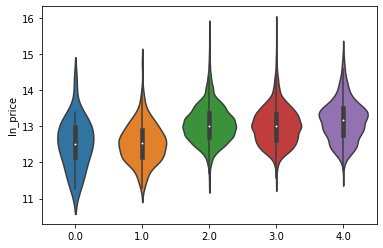

In [121]:
# Create a violin plot to understand correlation
X_iterable = [i[0] for i in X_cond_transform]
sns.violinplot(y=y, x=X_iterable);

In [122]:
# See how correlated Condition is with Price
cond_transform_df = pd.DataFrame(X_cond_transform)
pd.concat([y, cond_transform_df], axis=1).corr()

,ln_price,0
ln_price,1.000000,0.038918
0,0.038918,1.000000


As shown by the very low rsquared value and low correlation value, these two variables aren't very correlated; however, the pvalue is lower than our alpha which means the predictor is statistically significant. To check, we're going to One Hot Encode these values to see if a specific categorial variable is very correlated to price.

##### One Hot Encoding

In [127]:
ohe_cond = OneHotEncoder(drop='first') # drops average, first and most frequent
ohe_cond.fit(condition_df)
condition_encoded = pd.DataFrame(ohe_cond.transform(condition_df).todense(), columns=ohe_cond.get_feature_names())
#condition_encoded

In [128]:
# Run the regression
X_cond_encoded = sm.add_constant(condition_encoded)
X_condition_encoded_results = sm.OLS(y, X_cond_encoded).fit().summary()
X_condition_encoded_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     74.33
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           1.11e-62
Time:                        18:52:28   Log-Likelihood:                -16644.
No. Observations:               21597   AIC:                         3.330e+04
Df Residuals:                   21592   BIC:                         3.334e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.0567      0.004   2955.925      0.000      13.048      13.065
x0_Fair         -0.5174      0.040    -12.822      0.000      -0.597      -0.438
x0_Good         -0.0445      0.008     -5.405      0.000      -0.061      -0.028
x0_Poor         -0.5439      0.097     -5.594      0.000      -0.734      -0.353
x0_Very Good     0.1016      0.013      7.568      0.000       0.075       0.128
==============================================================================
Omnibus:                      901.392   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.502
Skew:                           0.446   Prob(JB):                    9.01e-251
Kurtosis:                       3.696   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As shown above, this model has a higher rsquared meaning it accounts for more variance in the target variable (only slighlty). Given the results, we will most likely use the One Hot Encoded condition variable in our model

#### grade

#### sqft_basement

In [26]:
# change sqft_basement data type to numeric
final_df['sqft_basement'].replace('?', 0, inplace=True)
final_df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

##### Since sqft_living is the variable most correlated to price (0.70), we will start by creating a simple linear regression between the two

In [93]:
# set up the simple linear regression between price and sqft_living
simple_endog = final_df['price']
simple_exog_sqftliving = sm.add_constant(df['sqft_living'])

simple_model = sm.OLS(simple_endog, simple_exog_sqftliving).fit().summary()

KeyError: 'price'

In [37]:
# run the simple linear regression model
simple_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:57:39   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model only explains 49.3% of the target variable variance, which is quite low. The predicor variable however is significant given that it's pvalue is smaller than our .05 alpha. A one unit increase in sqft_living will increase the price of a home by $280.86. 

##### Let's test out another highly correlated variable (0.61), sqft_above

In [38]:
# set up the simple linear regression between price and sqft_above
simple_exog_sqftabove = sm.add_constant(df['sqft_above'])

simple_model_2 = sm.OLS(simple_endog, simple_exog_sqftabove).fit().summary()

In [39]:
# run the simple linear regression model
simple_model_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:58:24   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.000    5.05e+04     6.9e+04
sqft_above   268.6684      2.404    111.767      0.000     263.957     273.380
==============================================================================
Omnibus:                    16492.245   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           728366.432
Skew:                           3.265   Prob(JB):                         0.00
Kurtosis:                      30.691   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As expected, this model explains less variance than the last at 36.6%. Sqft_above is also statistically significant, with a pvalue less than an alpha of .05. A one unit increase in sqft_above will increase the price of a home by $268.67.

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***